# 2D HDBScan

Description

In [1]:
# Reload the notebook if an external file is updated
%load_ext autoreload
%autoreload 2

import sys

from pathlib import Path

path = str(Path.cwd().parent)
sys.path.append(path)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from constant import PROJECTION
from datatype.dataset import Dataset
from hdbscan import HDBSCAN

In [3]:
PROJECTION.mkdir(parents=True, exist_ok=True)

In [4]:
dataset = Dataset('segment')
dataframe = dataset.load()

In [5]:
coordinates = (
    dataframe.umap_x_2d, 
    dataframe.umap_y_2d
)

embedding = np.column_stack(coordinates)

In [6]:
length = len(embedding)

# The smallest size we would expect a cluster to be
min_cluster_size = int(length * 0.01)

In [7]:
cluster = HDBSCAN(
    cluster_selection_method='leaf',
    gen_min_span_tree=True,
    min_cluster_size=min_cluster_size
).fit(embedding)

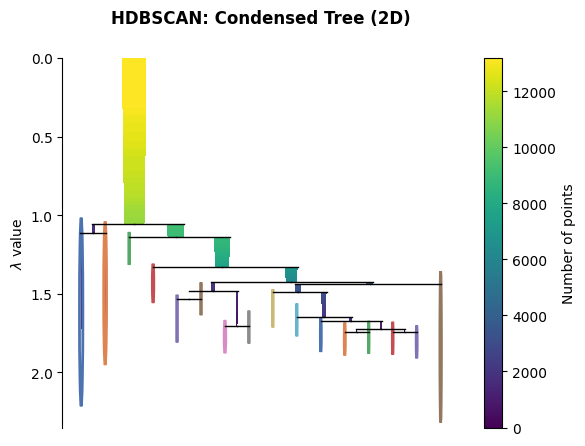

In [8]:
# Condensed tree
selection_palette = sns.color_palette('deep', min_cluster_size)

cluster.condensed_tree_.plot(
    select_clusters=True,
    selection_palette=selection_palette
)

file = PROJECTION.joinpath('hdbscan_condensed_tree_2d.png')

plt.title(
    'HDBSCAN: Condensed Tree (2D)',
    fontweight=600,
    fontsize=12,
    pad=25
)

plt.savefig(
    file,
    bbox_inches='tight',
    dpi=300,
    format='png'
)

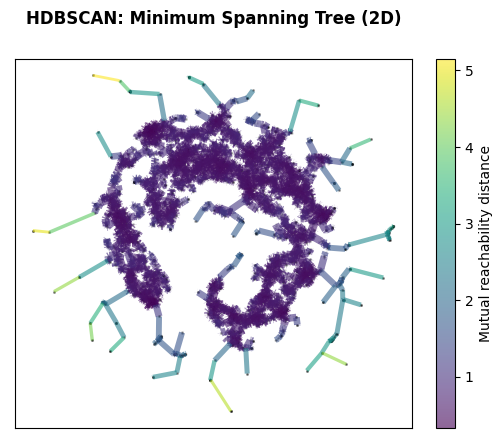

In [9]:
# Minimum spanning tree
cluster.minimum_spanning_tree_.plot(
    edge_alpha=0.6,
    edge_cmap='viridis',
    edge_linewidth=2,
    node_alpha=0.1,
    node_size=1.0
)

file = PROJECTION.joinpath('hdbscan_minimum_spanning_tree_2d.png')

plt.title(
    'HDBSCAN: Minimum Spanning Tree (2D)',
    fontweight=600,
    fontsize=12,
    pad=25
)

plt.savefig(
    file,
    bbox_inches='tight',
    dpi=300,
    format='png'
)

In [10]:
# # Single linkage tree
# cluster.single_linkage_tree_.plot()

# file = PROJECTION.joinpath('hdbscan_single_linkage_tree_2d.png')

# plt.title(
#     'HDBSCAN: Single Linkage Tree (2D)',
#     fontweight=600,
#     fontsize=12,
#     pad=25
# )

# plt.savefig(
#     file,
#     bbox_inches='tight',
#     dpi=300,
#     format='png'
# )

In [11]:
dataframe['hdbscan_label_2d'] = cluster.labels_

In [12]:
dataset.save(dataframe)